# **1ère méthode**





# Importation des images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
! unzip /content/drive/MyDrive/IA/base2.zip

Archive:  /content/drive/MyDrive/IA/base2.zip
   creating: IA/
   creating: IA/testing/
   creating: IA/testing/no_tumor/
  inflating: IA/testing/no_tumor/image(76).jpg  
  inflating: IA/testing/no_tumor/image(77).jpg  
  inflating: IA/testing/no_tumor/image(78).jpg  
  inflating: IA/testing/no_tumor/image(79).jpg  
  inflating: IA/testing/no_tumor/image(80).jpg  
  inflating: IA/testing/no_tumor/image(81).jpg  
  inflating: IA/testing/no_tumor/image(82).jpg  
  inflating: IA/testing/no_tumor/image(83).jpg  
  inflating: IA/testing/no_tumor/image(84).jpg  
  inflating: IA/testing/no_tumor/image(85).jpg  
  inflating: IA/testing/no_tumor/image(86).jpg  
  inflating: IA/testing/no_tumor/image(87).jpg  
  inflating: IA/testing/no_tumor/image(88).jpg  
  inflating: IA/testing/no_tumor/image(89).jpg  
  inflating: IA/testing/no_tumor/image(90).jpg  
  inflating: IA/testing/no_tumor/image(91).jpg  
  inflating: IA/testing/no_tumor/image(92).jpg  
  inflating: IA/testing/no_tumor/image(93).jp

In [ ]:
import os
print('total Testing tumor images:', len(os.listdir('/content/IA/testing/tumor')))
print('total Testing no_tumor images:', len(os.listdir('/content/IA/testing/no_tumor')))
print('\n')
print('total Training tumor images:', len(os.listdir('/content/IA/Training/tumor')))
print('total Training no_tumor images:', len(os.listdir('/content/IA/Training/no_tumor')))

total Testing tumor images: 20
total Testing no_tumor images: 20


total Training tumor images: 100
total Training no_tumor images: 100


In [ ]:
train_dir = '/content/IA/Training'
testing_dir = '/content/IA/testing'

# Création d'un modèle CNN (convolutional neural network)

In [ ]:
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
model = Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu',input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 256)     590080    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 64)        147520    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   zoom_range=0.4,
                                   horizontal_flip=False,
                                   vertical_flip=True,
                                   fill_mode='nearest')
Val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=1,
    class_mode='binary')
testing_generator = Val_datagen.flow_from_directory(
    testing_dir,
    target_size=(227, 227),
    batch_size=1,
    class_mode='binary')

Found 200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


# Compilation du modèle avec l'optimiseur adam



In [ ]:
early = EarlyStopping(monitor='val_loss', mode='min')
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_generator,epochs=25, validation_data=testing_generator, callbacks=callbacks_list)

Epoch 1/25
200/200 [==============================] - 219s 1s/step - loss: 0.7362 - accuracy: 0.5100 - val_loss: 0.6939 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/25
200/200 [==============================] - 215s 1s/step - loss: 0.7147 - accuracy: 0.5100 - val_loss: 0.6882 - val_accuracy: 0.6000 - lr: 0.0010


In [ ]:
model.save_weights("modelscratch.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='/content/IA/testing/no_tumor/image(91).jpg'

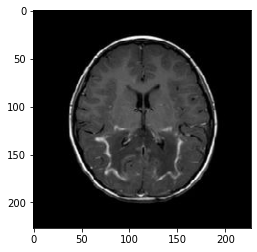

Predicted: [[0.55370563]] no_tumor


In [ ]:
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'tumor' if score < 0.5 else 'no_tumor')

# **2ème méthode**

In [ ]:
from tensorflow.keras import applications
from keras.models import Sequential
from keras.layers import Dropout,Dense,Conv2D,GlobalAveragePooling2D
from keras.models import Model
img_width,img_height=224,224
base_model =applications.VGG19(weights='imagenet',include_top=False,input_shape=(img_width,img_height,3))
top_model=Sequential()
top_model.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:],data_format=None))
top_model.add(Dense(256,activation='relu'))
top_model.add(Dropout(0.25))
top_model.add(Dense(1,activation='sigmoid'))
modeltransfer=Model(inputs=base_model.input,outputs=top_model(base_model.output))

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
early = EarlyStopping(monitor='val_loss', mode='min')
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]
modeltransfer.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = modeltransfer.fit(train_generator,epochs=25, validation_data=testing_generator, callbacks=callbacks_list)

Epoch 1/25
80/80 [==============================] - 239s 3s/step - loss: 49662.4141 - accuracy: 0.4750 - val_loss: 0.7202 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/25
80/80 [==============================] - 239s 3s/step - loss: 0.7611 - accuracy: 0.5000 - val_loss: 0.6942 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/25
80/80 [==============================] - 239s 3s/step - loss: 0.7572 - accuracy: 0.5750 - val_loss: 0.7027 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/25
80/80 [==============================] - 237s 3s/step - loss: 0.8282 - accuracy: 0.4625 - val_loss: 0.7103 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/25
80/80 [==============================] - 237s 3s/step - loss: 0.7553 - accuracy: 0.4750 - val_loss: 0.6960 - val_accuracy: 0.5000 - lr: 0.0010


In [ ]:
modeltransfer.save_weights("modelTransfer.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='/content/IA/testing/tumor/image(31).jpg'

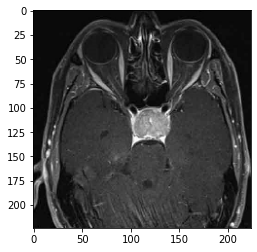

Predicted: [[0.45969597]] tumor


In [ ]:
img = image.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = modeltransfer.predict(x)
print('Predicted:', score, 'tumor' if score < 0.5 else 'no_tumor') 